## Exemple de bază cu Pandas

Acest notebook te va ghida prin câteva concepte foarte simple legate de Pandas. Vom începe prin importarea bibliotecilor tipice utilizate în știința datelor:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Serii

Seriile sunt similare cu o listă sau un array unidimensional, dar au un index. Toate operațiunile sunt aliniate pe baza indexului.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


Unul dintre utilizările frecvente ale seriilor este **seria temporală**. În seria temporală, indexul are o structură specială - de obicei, un interval de date sau date-timp. Putem crea un astfel de index folosind `pd.date_range`.

Să presupunem că avem o serie care arată cantitatea de produs cumpărată în fiecare zi și știm că în fiecare duminică trebuie să luăm și un articol pentru noi. Iată cum putem modela acest lucru folosind serii:


Length of index is 366


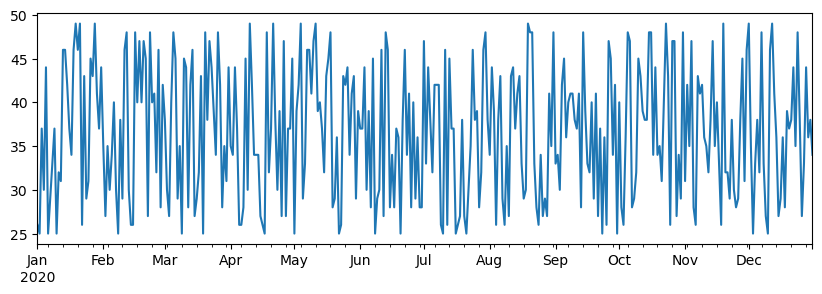

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


Așa cum puteți vedea, avem probleme aici, deoarece în seria săptămânală zilele nemenționate sunt considerate ca lipsă (`NaN`), iar adăugarea lui `NaN` la un număr ne dă `NaN`. Pentru a obține rezultatul corect, trebuie să specificăm `fill_value` atunci când adăugăm seriile:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


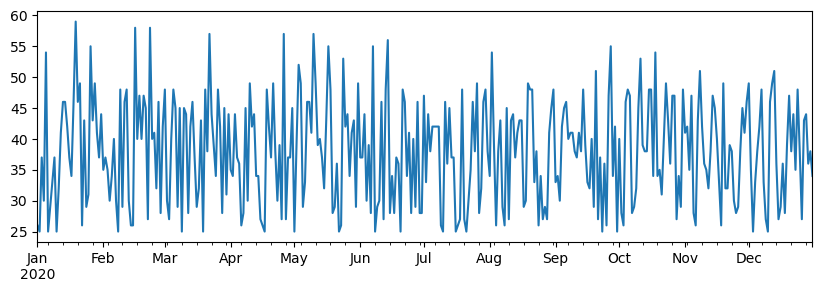

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

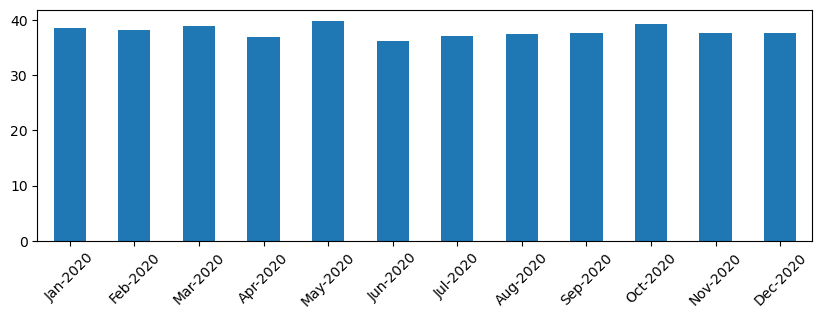

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

Un dataframe este, în esență, o colecție de serii cu același index. Putem combina mai multe serii împreună într-un dataframe. Având seriile `a` și `b` definite mai sus:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

Putem folosi, de asemenea, Series ca coloane și să specificăm numele coloanelor folosind un dicționar:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

Același rezultat poate fi obținut prin transpunere (și apoi redenumirea coloanelor, pentru a se potrivi cu exemplul anterior):


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**Selectarea coloanelor** din DataFrame se poate face astfel:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**Selectarea rândurilor** pe baza expresiei de filtrare:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

Modul în care funcționează este că expresia `df['A']<5` returnează o serie booleană, care indică dacă expresia este `True` sau `False` pentru fiecare element al seriei. Când seria este utilizată ca index, aceasta returnează un subset de rânduri din DataFrame. Astfel, nu este posibil să utilizați o expresie booleană Python arbitrară, de exemplu, scrierea `df[df['A']>5 and df['A']<7]` ar fi greșită. În schimb, ar trebui să utilizați operația specială `&` pe seria booleană:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**Crearea de noi coloane calculabile**. Putem crea cu ușurință noi coloane calculabile pentru DataFrame-ul nostru folosind expresii intuitive. Codul de mai jos calculează abaterea lui A față de valoarea sa medie.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

Ceea ce se întâmplă de fapt este că calculăm un șir, iar apoi atribuim acest șir părții din stânga, creând o altă coloană.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

**Selectarea rândurilor pe baza numerelor** poate fi realizată folosind construcția `iloc`. De exemplu, pentru a selecta primele 5 rânduri din DataFrame:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**Gruparea** este adesea utilizată pentru a obține un rezultat similar cu *tabelele pivot* din Excel. Să presupunem că dorim să calculăm valoarea medie a coloanei `A` pentru fiecare număr dat de `LenB`. Atunci putem grupa DataFrame-ul nostru după `LenB` și să apelăm `mean`:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

Dacă trebuie să calculăm media și numărul de elemente din grup, atunci putem folosi funcția `aggregate` mai complexă:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## Imprimare și Plotare

Un Data Scientist trebuie adesea să exploreze datele, așa că este important să poată vizualiza aceste date. Când un DataFrame este mare, de multe ori dorim doar să ne asigurăm că facem totul corect, imprimând primele câteva rânduri. Acest lucru poate fi realizat apelând `df.head()`. Dacă rulați acest lucru din Jupyter Notebook, DataFrame-ul va fi afișat într-un format tabular plăcut.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

Am văzut, de asemenea, utilizarea funcției `plot` pentru a vizualiza unele coloane. Deși `plot` este foarte util pentru multe sarcini și acceptă multe tipuri diferite de grafice prin intermediul parametrului `kind=`, poți întotdeauna să folosești biblioteca `matplotlib` direct pentru a crea ceva mai complex. Vom aborda vizualizarea datelor în detaliu în lecțiile separate ale cursului.


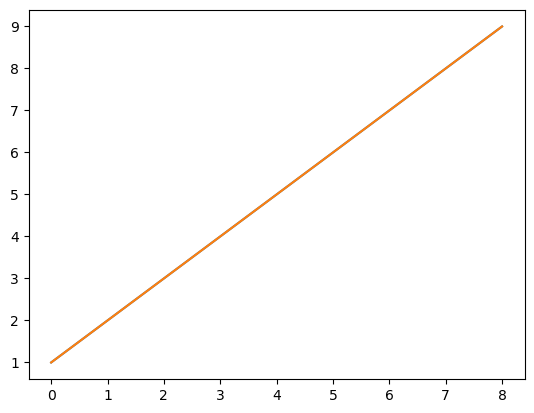

In [61]:
df['A'].plot()
plt.show()

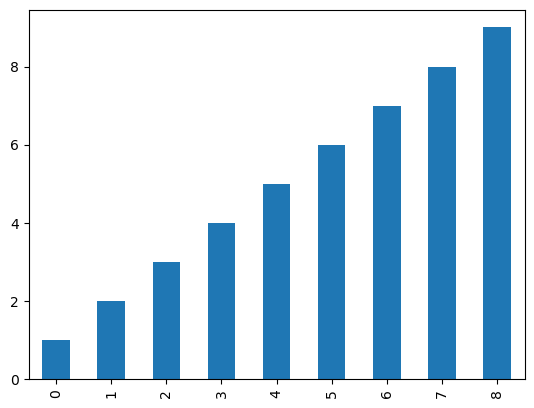

In [63]:
df['A'].plot(kind='bar')
plt.show()

Această prezentare generală acoperă cele mai importante concepte ale Pandas, totuși, biblioteca este foarte bogată și nu există limite în ceea ce poți realiza cu ea! Să aplicăm acum aceste cunoștințe pentru a rezolva o problemă specifică.



---

**Declinarea responsabilității**:  
Acest document a fost tradus folosind serviciul de traducere AI [Co-op Translator](https://github.com/Azure/co-op-translator). Deși depunem eforturi pentru a asigura acuratețea, vă rugăm să rețineți că traducerile automate pot conține erori sau inexactități. Documentul original în limba sa nativă ar trebui considerat sursa autoritară. Pentru informații critice, se recomandă traducerea profesională realizată de un specialist uman. Nu ne asumăm răspunderea pentru eventualele neînțelegeri sau interpretări greșite care pot apărea din utilizarea acestei traduceri.
